In [6]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import pandas as pd

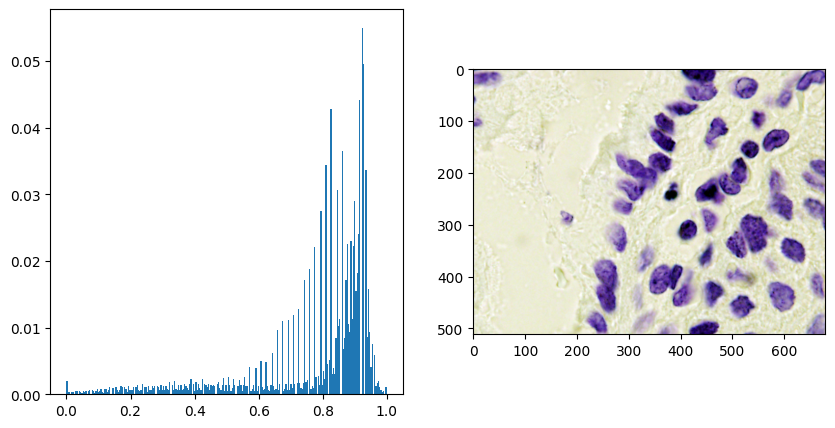

In [2]:
def plt_img_hist(img_path):
    img_arr = plt.imread(img_path)
    counts, bins = np.histogram(img_arr, bins=256, density=True)
    counts = counts / counts.sum()
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    # axes[0].plot(bins[:-1], counts)
    # axes[0].stairs(counts, bins)
    axes[0].hist(bins[:-1], bins, weights=counts)
    axes[1].imshow(img_arr)
    plt.show()    

plt_img_hist("few/imgs/44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078.png")

In [5]:
def pixel_dist(img_path):
    img_arr = plt.imread(img_path)
    counts, bins = np.histogram(img_arr, bins=256, density=True)
    counts = counts / counts.sum()
    return counts
    

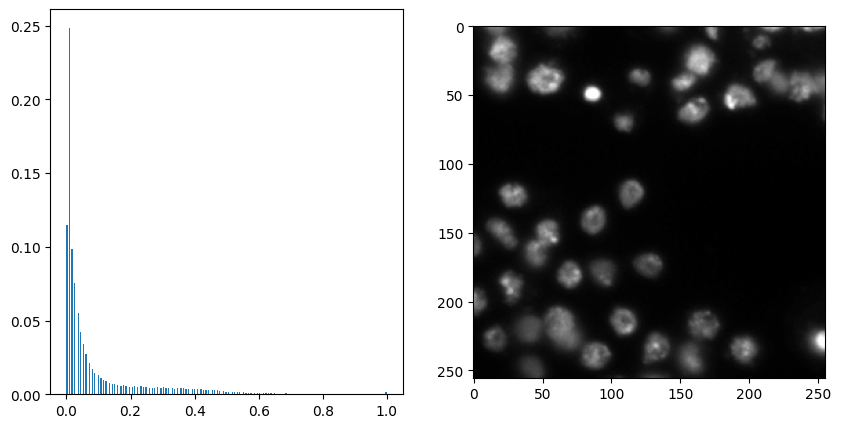

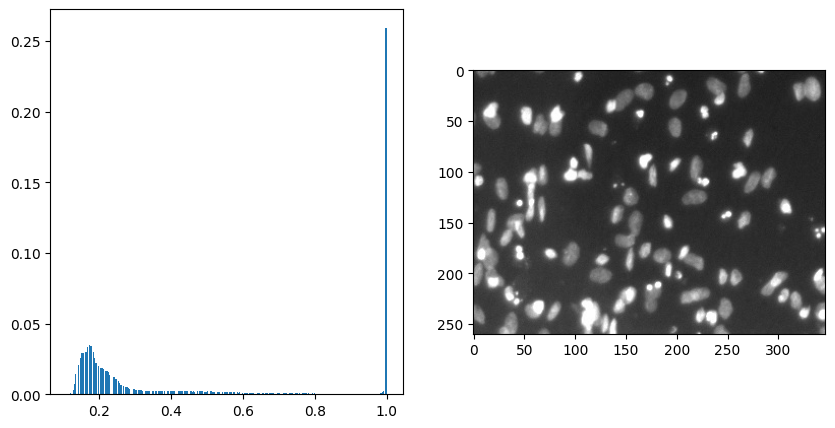

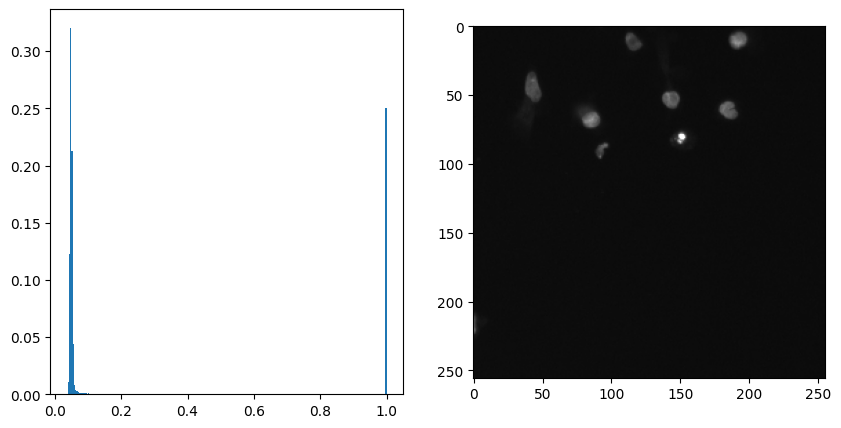

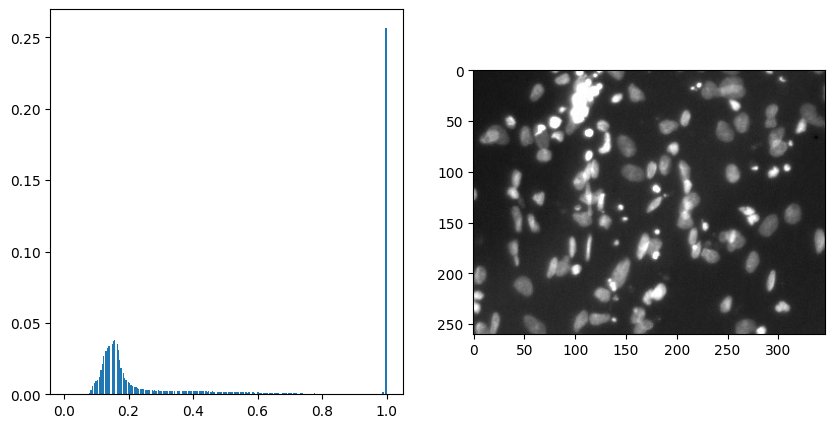

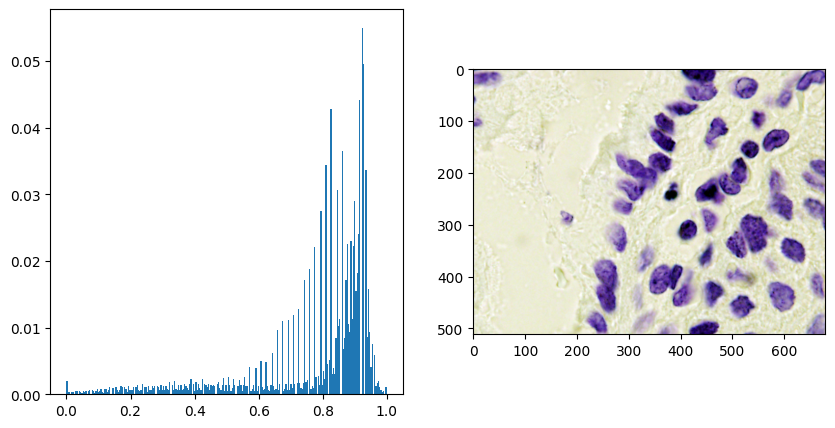

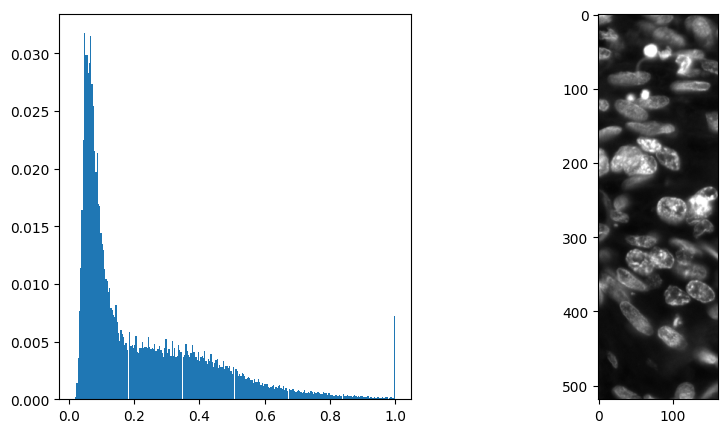

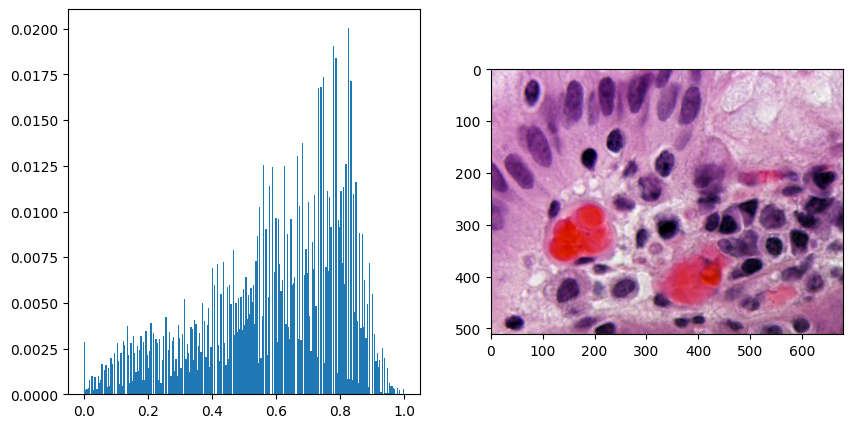

In [3]:
for img_id in os.listdir("few/imgs"):
    if not img_id.endswith(".png"): continue
    img_path = os.path.join("few/imgs", img_id)
    plt_img_hist(img_path)

In [26]:
DATA_DIR = "/home/pampuch/studia/dls/segmentation/data"
images_dir = os.path.join(DATA_DIR, "stage1_train_categories")
img_class = []
img_arr = []

for img_cat in os.listdir(images_dir):
    # imgs_dict[cat_dir] = {"path": os.path.join(images_dir, cat_dir)}
    # imgs_dict[cat_dir]["imgs_ids"]
    for img_path in os.listdir(os.path.join(images_dir, img_cat)):
        img_class.append(img_cat)
        img_arr.append(pixel_dist(os.path.join(images_dir, img_cat, img_path)))
        assert len(pixel_dist(os.path.join(images_dir, img_cat, img_path))) == 256

img_classes_df = pd.DataFrame(data = {"class": img_class, "pixel_hist": img_arr})

In [19]:
img_classes_df

,class,pixel_hist
0,white,"[7.152568432235488e-07, 0.0, 5.722027856433382..."
1,white,"[7.152570211514493e-07, 7.152537236989287e-07,..."
2,white,"[7.152570917756544e-07, 2.8610153011369645e-06..."
3,white,"[1.7881393432617188e-05, 2.1457672119140625e-0..."
4,white,"[7.152559915759319e-07, 0.0, 0.0, 0.0, 0.0, 0...."
...,...,...
665,color,"[3.051758146965797e-06, 9.155273345206866e-06,..."
666,color,"[9.15527795157292e-06, 1.2207037268763894e-05,..."
667,color,"[1.2207046181387831e-05, 6.103510669809793e-05..."
668,color,"[0.00634765625, 0.00185546875, 0.0018585205078..."


In [20]:
img_classes_df.dtypes

class         object
pixel_hist    object
dtype: object

In [25]:
type(img_classes_df["pixel_hist"].to_numpy()[0][0])

numpy.float64

In [34]:
from sklearn.cluster import KMeans
kmeans_2 = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(img_arr)
kmeans_3 = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(img_arr)

In [35]:
img_classes_df['kmeans_2_label'] = kmeans_2.labels_
img_classes_df['kmeans_3_label'] = kmeans_3.labels_

In [36]:
img_classes_df

,class,pixel_hist,kmeans_2_label,kmeans_3_label
0,white,"[7.152568432235488e-07, 0.0, 5.722027856433382...",0,0
1,white,"[7.152570211514493e-07, 7.152537236989287e-07,...",0,0
2,white,"[7.152570917756544e-07, 2.8610153011369645e-06...",0,0
3,white,"[1.7881393432617188e-05, 2.1457672119140625e-0...",0,0
4,white,"[7.152559915759319e-07, 0.0, 0.0, 0.0, 0.0, 0....",0,0
...,...,...,...,...
665,color,"[3.051758146965797e-06, 9.155273345206866e-06,...",0,0
666,color,"[9.15527795157292e-06, 1.2207037268763894e-05,...",0,0
667,color,"[1.2207046181387831e-05, 6.103510669809793e-05...",0,0
668,color,"[0.00634765625, 0.00185546875, 0.0018585205078...",0,0


In [43]:
img_classes_df[img_classes_df["class"] == "white"]["kmeans_2_label"].value_counts()

kmeans_2_label
0    16
Name: count, dtype: int64

In [47]:
for img_class in img_classes_df["class"].unique():
    print(f"Clustering ids count for {img_class} images")
    print(img_classes_df[img_classes_df["class"] == img_class]["kmeans_2_label"].value_counts())
    print("-"*30)

Clustering ids count for white images
kmeans_2_label
0    16
Name: count, dtype: int64
------------------------------
Clustering ids count for black images
kmeans_2_label
1    428
0    118
Name: count, dtype: int64
------------------------------
Clustering ids count for color images
kmeans_2_label
0    108
Name: count, dtype: int64
------------------------------


In [48]:
for img_class in img_classes_df["class"].unique():
    print(f"Clustering ids count for {img_class} images")
    print(img_classes_df[img_classes_df["class"] == img_class]["kmeans_3_label"].value_counts())
    print("-"*30)

Clustering ids count for white images
kmeans_3_label
0    16
Name: count, dtype: int64
------------------------------
Clustering ids count for black images
kmeans_3_label
1    288
0    244
2     14
Name: count, dtype: int64
------------------------------
Clustering ids count for color images
kmeans_3_label
0    108
Name: count, dtype: int64
------------------------------
